<a href="https://colab.research.google.com/github/Ibnupraditya/postest2-datamining/blob/main/125_Mohammad_Ibnu_Praditya_POSTTEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

# TABEL TABULASI

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

print("\nTABULASI")
df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)


TABULASI
    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0        

<ipython-input-6-643e8049610b>:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


# DAFTAR SUPPORT DAN CONFIDENT

In [ ]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# find frequently occurring itemsets (support) with Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# find association rules with Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# create table of support for itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# create table of support and confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)

                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(semi-finished bread, whole milk, sausage)           5.26%
(sausage, yogurt, semi-finished bread)               5.26%
(sausage, whole milk, yogurt)                        5.26%
(semi-finished bread, whole milk, yogurt)            5.26%
(sausage, whole milk, yogurt, semi-finished bread)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
beef                         white bread   5.26%    100.0

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

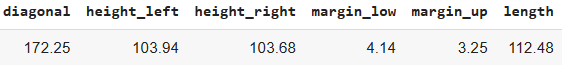
<!-- 1412 -->

In [ ]:

import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [ ]:
import pandas as pd
import math

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df_sorted[df_sorted["is_genuine"] == True])
num_false = len(df_sorted[df_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


Jumlah True:  3
Jumlah False:  0


In [ ]:
# Mengambil Data Terdekat Dengan Target
data = pd.read_csv("deteksi_uang_palsu.csv")

test_data = pd.DataFrame({
    'is_genuine': [True],
    'diagonal': [172.20],
    'height_left': [104.12],
    'height_right': [103.64],
    'margin_low': [4.38],
    'margin_up': [3.00],
    'length': [113.18]
})

# Menghitung Jarak
distances = pd.DataFrame()
distances['distance'] = ((data.iloc[:,1:] - test_data.iloc[:,1:])**2).sum(axis=1)**0.5

# Menambahkan Kolom Jarak ke Data
data['distance'] = distances['distance']

# Mengurutkan Data Berdasarkan Jarak Terdekat
k = int(math.sqrt(len(data)))
sorted_data = data.sort_values(by='distance').head(k)

# Melakukan Klasifikasi Berdasarkan Mayoritas Kelas
pred_label = sorted_data['is_genuine'].value_counts().idxmax()

# Menampilkan Hasil Prediksi
print("Hasil prediksi: ", pred_label)

Hasil prediksi:  True


# (3) Analisis

> Nama : Mohammad Ibnu Praditya

> Nim : 2109116125


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Akreditasi Sekolah

# Business Understanding

Di dalam Dataset ini bertujuan untuk melihat Data dari Siswa Sekolah

# Data UnderStanding

In [ ]:
import pandas as pd

In [72]:
df = pd.read_csv('retailMarketingDI.csv')
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


In [73]:
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64

In [ ]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

# Collect Intial Data 

In [74]:
df = pd.read_csv("retailMarketingDI.csv")
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


In [75]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0


In [76]:
df.tail()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0
999,Young,Male,Rent,Married,Close,53600,1,Medium,24,973.0


In [77]:
# df1 isinya dataset dengan label target SD
df1 = df[df['Age'] == 'Young']

# Menampilkan hasil filter
print(df1)

       Age  Gender OwnHome  Married Location  Salary  Children History  \
2    Young  Female    Rent   Single    Close   13500         0     Low   
5    Young    Male     Own  Married    Close   30400         0     Low   
10   Young    Male    Rent  Married    Close   43700         1     NaN   
20   Young  Female    Rent   Single      Far   14300         2     Low   
21   Young    Male    Rent  Married    Close   49800         0  Medium   
..     ...     ...     ...      ...      ...     ...       ...     ...   
974  Young    Male    Rent  Married    Close   45500         0  Medium   
983  Young    Male    Rent  Married    Close   49300         0     NaN   
994  Young    Male    Rent   Single    Close   17600         0     NaN   
995  Young  Female    Rent   Single    Close   19400         1     NaN   
999  Young    Male    Rent  Married    Close   53600         1  Medium   

     Catalogs  AmountSpent  
2          18        296.0  
5           6        495.0  
10         12        927

In [78]:
# df2 isinya dataset dengan label target bukan SD
df2 = df[df['OwnHome'] == 'Rent']

# Menampilkan hasil filter
print(df2)

        Age  Gender OwnHome  Married Location  Salary  Children History  \
1    Middle    Male    Rent   Single    Close   63600         0    High   
2     Young  Female    Rent   Single    Close   13500         0     Low   
6    Middle  Female    Rent   Single    Close   48100         0  Medium   
10    Young    Male    Rent  Married    Close   43700         1     NaN   
18   Middle    Male    Rent   Single    Close   38600         1     Low   
..      ...     ...     ...      ...      ...     ...       ...     ...   
991     Old  Female    Rent   Single      Far   11700         0     Low   
994   Young    Male    Rent   Single    Close   17600         0     NaN   
995   Young  Female    Rent   Single    Close   19400         1     NaN   
996  Middle    Male    Rent   Single      Far   40500         1     NaN   
999   Young    Male    Rent  Married    Close   53600         1  Medium   

     Catalogs  AmountSpent  
1           6       1318.0  
2          18        296.0  
6          1

# Describe Data

In [79]:
# df3 isinya dataset dengan label target Far
df3 = df[df['Location'] == 'Far']

# Menampilkan hasil filter
print(df3)

        Age  Gender OwnHome  Married Location  Salary  Children History  \
0       Old  Female     Own   Single      Far   47500         0    High   
9       Old    Male     Own  Married      Far   80700         0     NaN   
11   Middle    Male     Own  Married      Far  111800         3    High   
14      Old  Female     Own  Married      Far  110000         0    High   
15   Middle  Female     Own  Married      Far   83100         1     NaN   
..      ...     ...     ...      ...      ...     ...       ...     ...   
987     Old    Male     Own  Married      Far  112900         0    High   
989  Middle    Male     Own  Married      Far  102700         1    High   
991     Old  Female    Rent   Single      Far   11700         0     Low   
993  Middle  Female     Own  Married      Far   99200         0    High   
996  Middle    Male    Rent   Single      Far   40500         1     NaN   

     Catalogs  AmountSpent  
0           6        755.0  
9          18       3034.0  
11         1

In [80]:
# df4 isinya dataset dengan label target selling_price di bawah 100
df4 = df[df['Catalogs'] < 10]

# Menampilkan hasil filter
print(df4)

        Age  Gender OwnHome  Married Location  Salary  Children History  \
0       Old  Female     Own   Single      Far   47500         0    High   
1    Middle    Male    Rent   Single    Close   63600         0    High   
5     Young    Male     Own  Married    Close   30400         0     Low   
8    Middle  Female     Own  Married    Close   51900         3     Low   
20    Young  Female    Rent   Single      Far   14300         2     Low   
..      ...     ...     ...      ...      ...     ...       ...     ...   
978  Middle    Male     Own  Married      Far   93000         3    High   
980     Old  Female     Own   Single    Close   33000         3     NaN   
982  Middle  Female    Rent   Single    Close   33200         1     NaN   
992  Middle    Male     Own  Married    Close  101700         1     NaN   
994   Young    Male    Rent   Single    Close   17600         0     NaN   

     Catalogs  AmountSpent  
0           6        755.0  
1           6       1318.0  
5           

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1000 non-null   object 
 1   Gender       1000 non-null   object 
 2   OwnHome      1000 non-null   object 
 3   Married      1000 non-null   object 
 4   Location     1000 non-null   object 
 5   Salary       1000 non-null   int64  
 6   Children     1000 non-null   int64  
 7   History      697 non-null    object 
 8   Catalogs     1000 non-null   int64  
 9   AmountSpent  994 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [82]:
df.select_dtypes(include=np.number)

,Salary,Children,Catalogs,AmountSpent
0,47500,0,6,755.0
1,63600,0,6,1318.0
2,13500,0,18,296.0
3,85600,1,18,2436.0
4,68400,0,12,1304.0
...,...,...,...,...
995,19400,1,18,384.0
996,40500,1,18,1073.0
997,44800,0,24,1417.0
998,79000,2,18,671.0


In [ ]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [83]:
tampil("Salary")

Nilai minimum         : 0
Nilai maksimum        : 168800


In [84]:
tampil("Children")

Nilai minimum         : 0
Nilai maksimum        : 3


In [85]:
tampil("Catalogs")

Nilai minimum         : 6
Nilai maksimum        : 24


# Explore Data

# Visualisasi Comparison

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [86]:
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


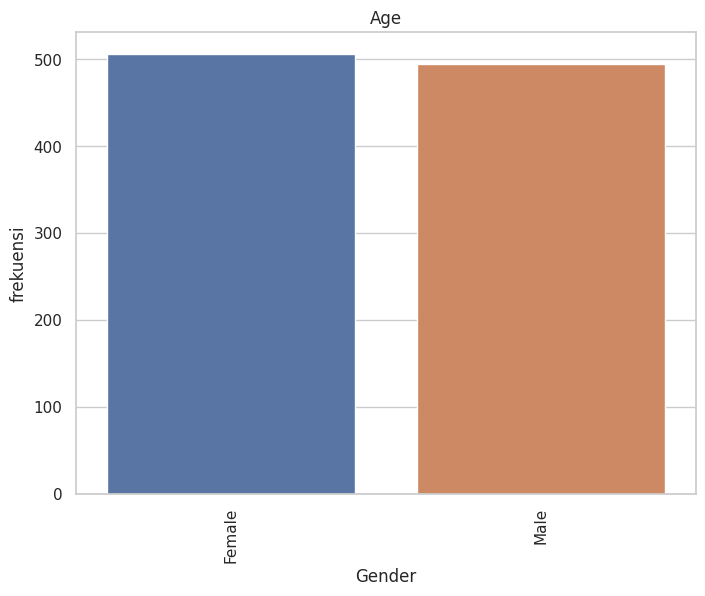

In [87]:
country_count = Counter(df['Gender'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Age')
plt.xlabel('Gender')
plt.ylabel('frekuensi')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

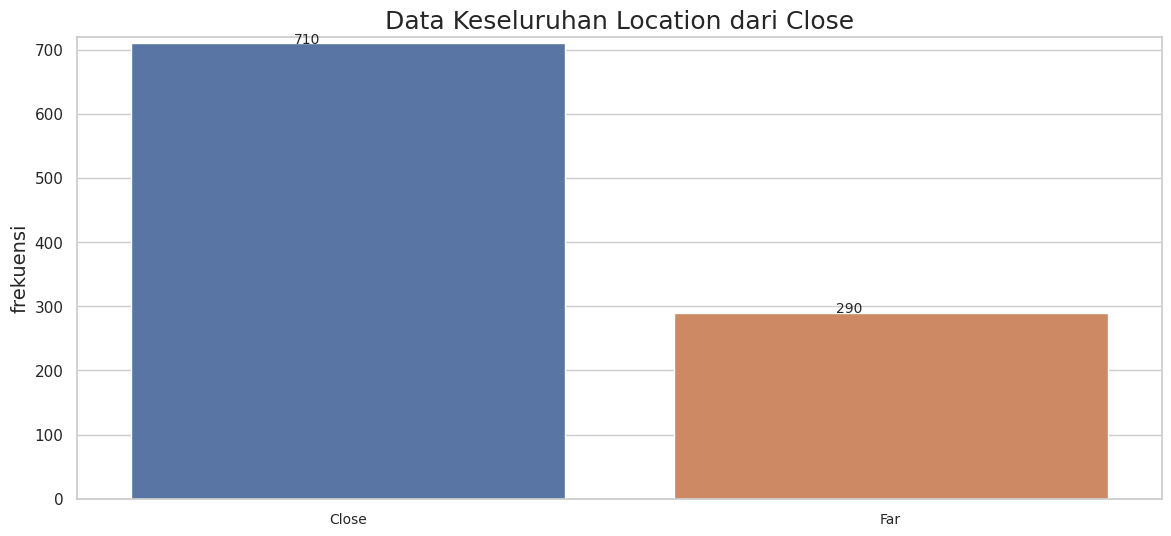

In [89]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['Location'].fillna('NaN').value_counts().index[0:4]
count = df['Location'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan Location dari Close', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('frekuensi', fontsize = 14)
ax.set_ylim(0, df['Location'].fillna('NaN').value_counts()[0]+10)

plt.show()

# Visualisai Distribution

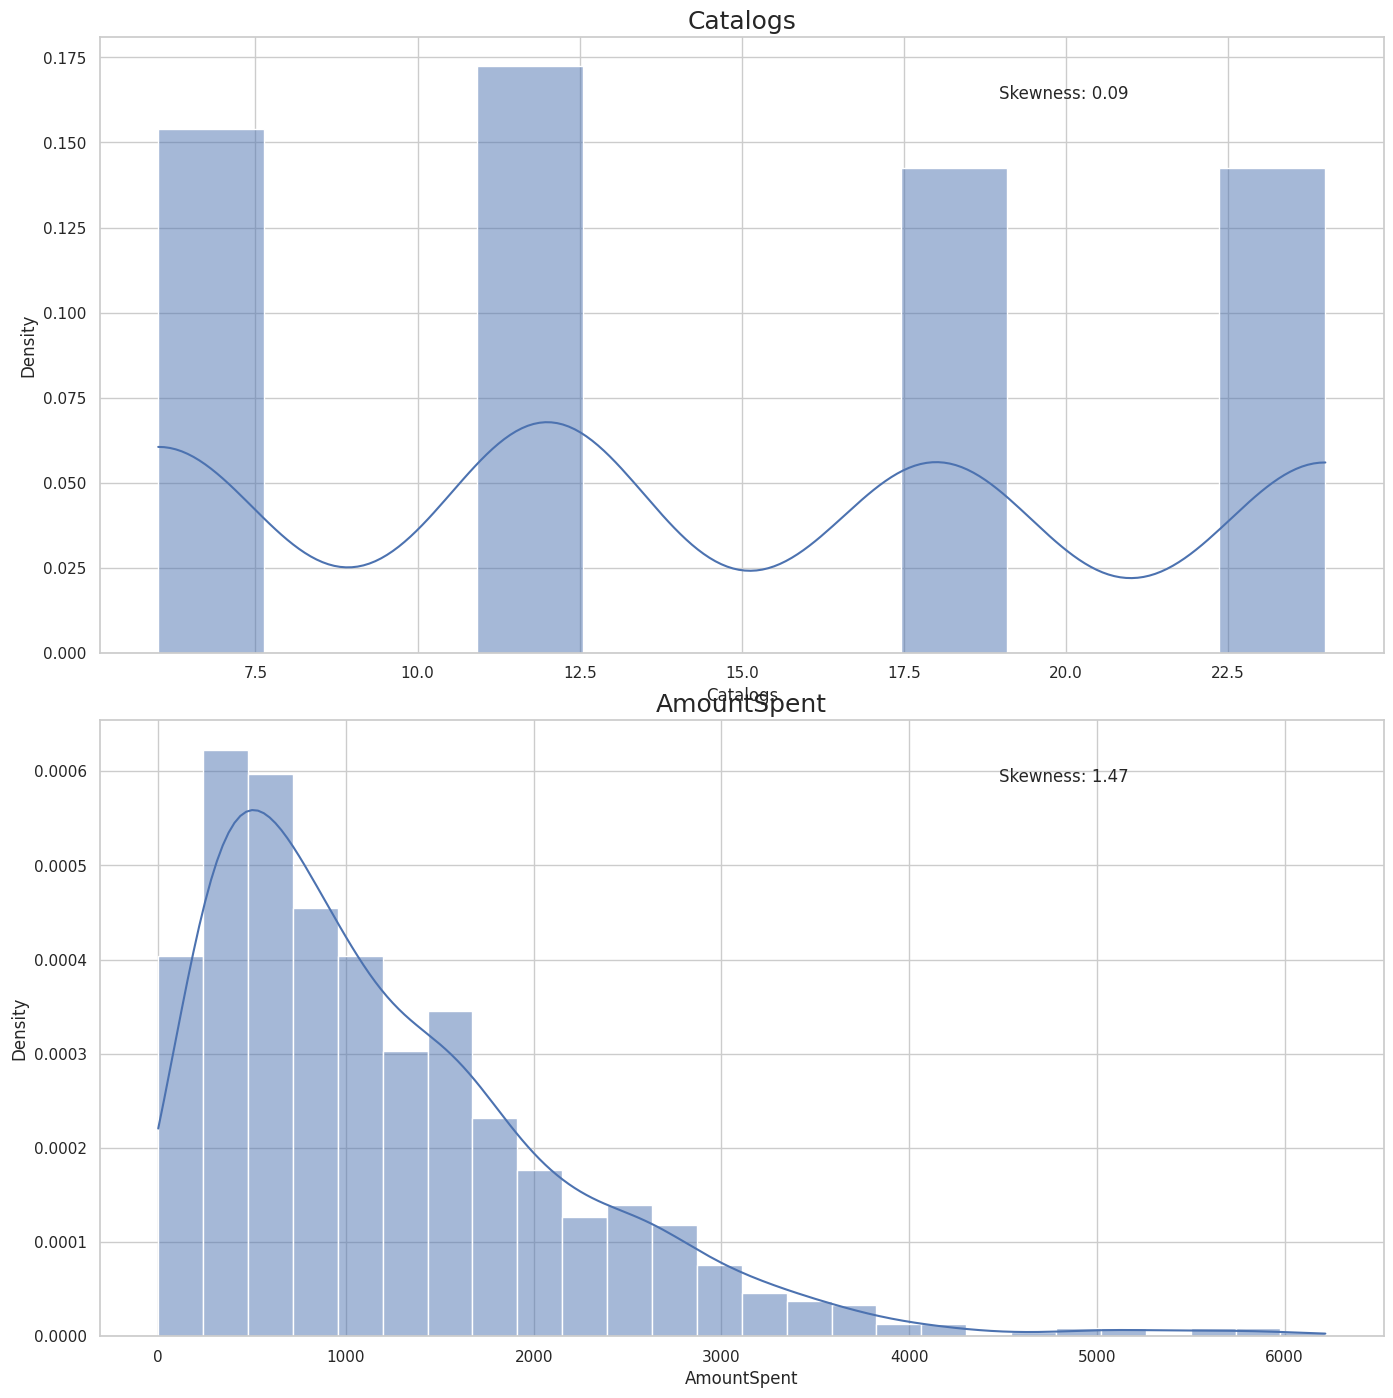

In [92]:
# Mendefinisikan Kolom pada list dari dataset
num_cols = ['Catalogs', 'AmountSpent']


# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    ax.annotate(f"Skewness: {df[col].skew():.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.show()

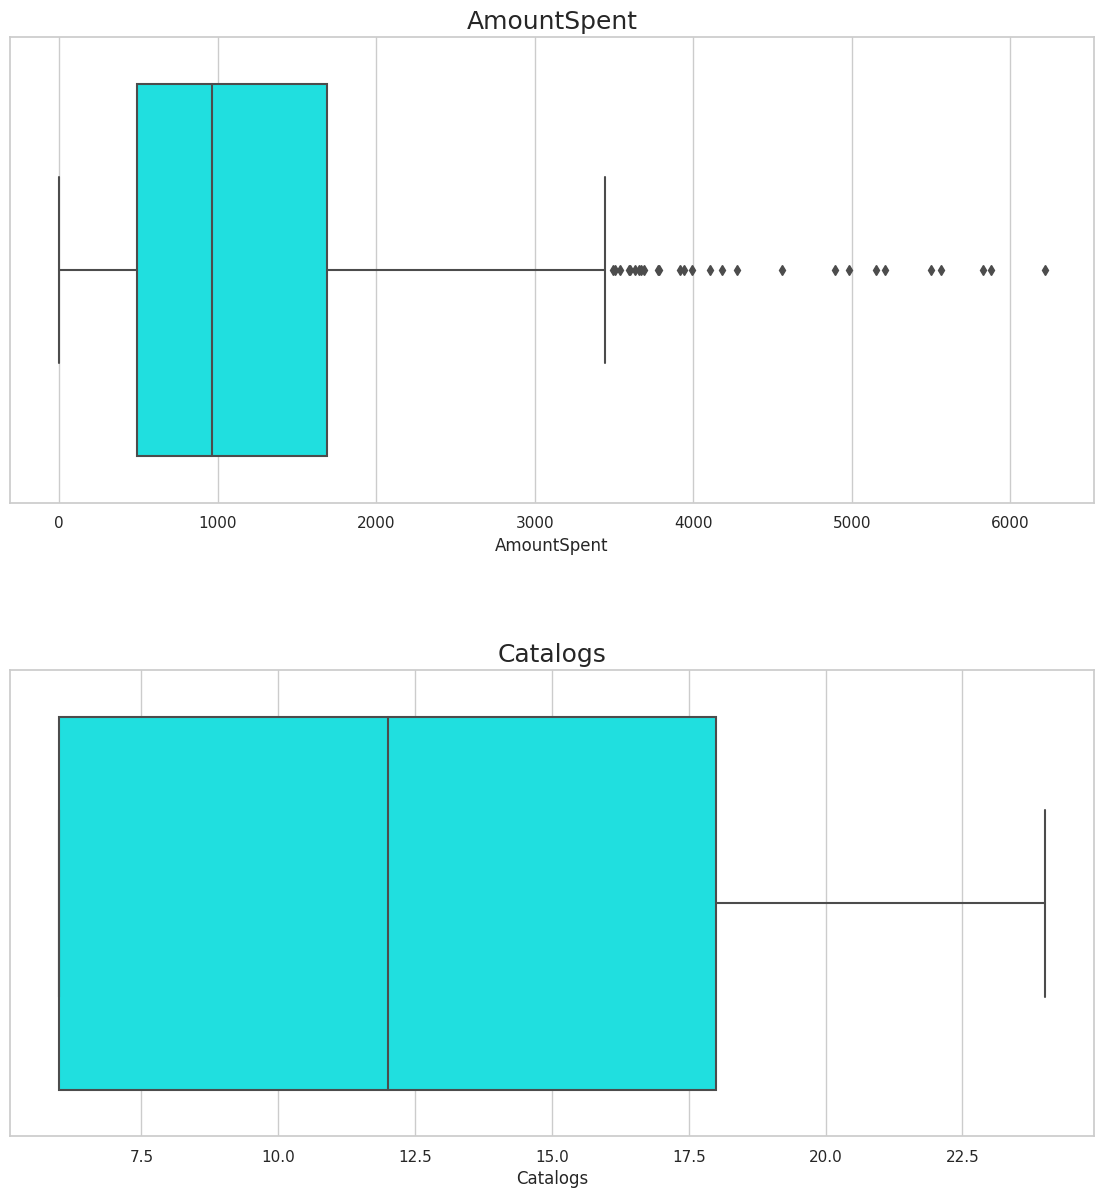

In [93]:
num_cols = ['AmountSpent', 'Catalogs']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

# Visualisai Relationship

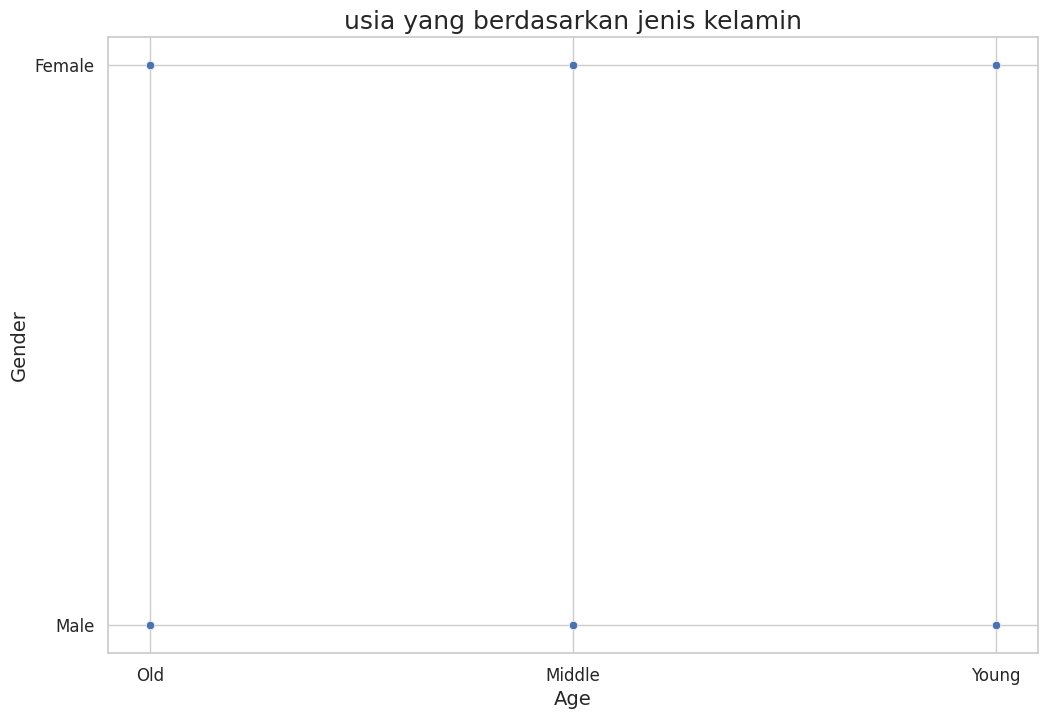

In [99]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="Age", y="Gender")
ax.set_title('usia yang berdasarkan jenis kelamin', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Gender', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [94]:
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


# Visualisasi Composition

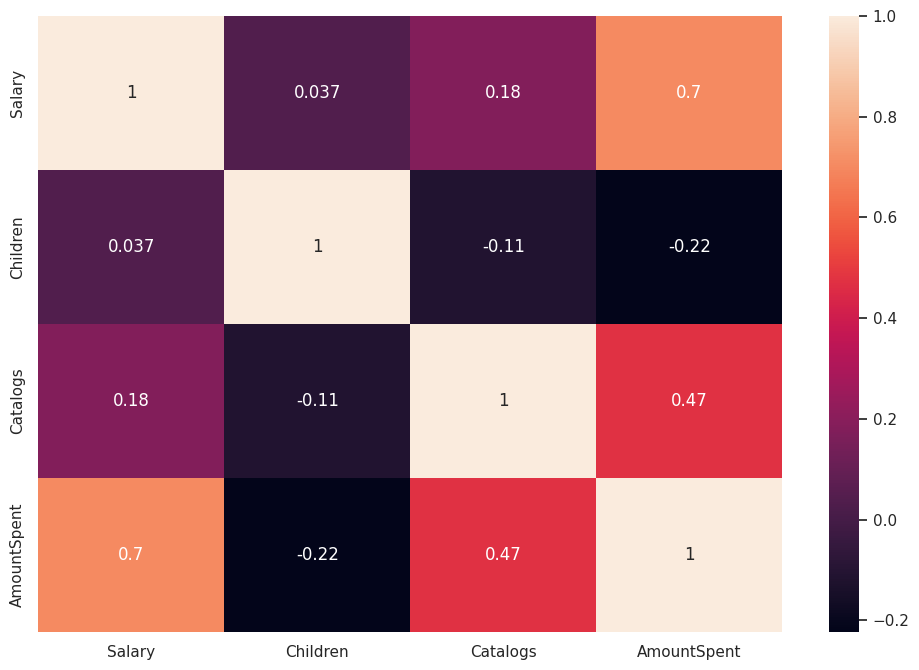

In [96]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
plt.show()

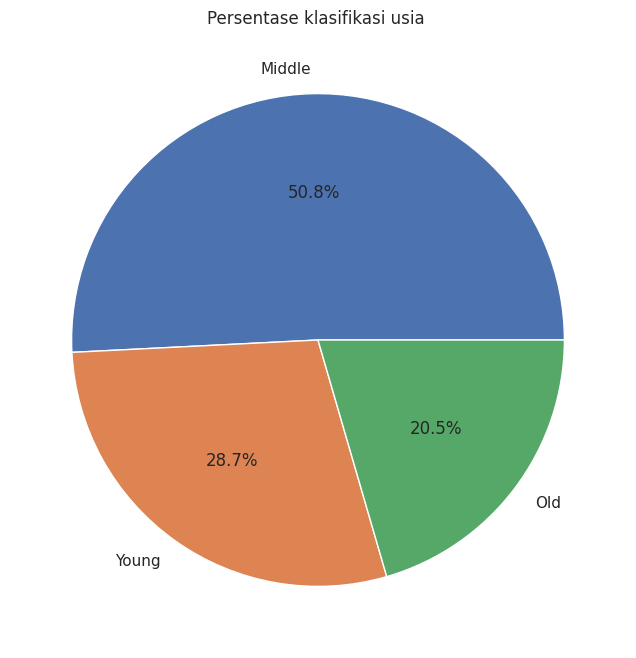

In [98]:
#Calculate count of each Level akreditasi
level_count = df['Age'].value_counts()

#Create pie chart for Level tumor
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase klasifikasi usia ')
plt.show()

# Verify Data Qualify

In [100]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64


In [101]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [102]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Age             0
AmountSpent    27
Catalogs        0
Children        0
Gender          0
History         0
Location        0
Married         0
OwnHome         0
Salary          1
dtype: int64


<ipython-input-102-650d731e3b3f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [103]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 Age             object
Gender          object
OwnHome         object
Married         object
Location        object
Salary           int64
Children         int64
History         object
Catalogs         int64
AmountSpent    float64
dtype: object


#Data Preparation

##select data

In [ ]:
import pandas as pd

In [105]:
df = pd.read_csv("retailMarketingDI.csv")

In [107]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["Age", "Gender"]]

# Menampilkan Perintah
print(selected_data.head())

      Age  Gender
0     Old  Female
1  Middle    Male
2   Young  Female
3  Middle    Male
4  Middle  Female


In [108]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["Age", "Gender"]]

# Menampilkan Perintah
print(selected_data.head())

      Age  Gender
0     Old  Female
1  Middle    Male
2   Young  Female
3  Middle    Male
4  Middle  Female


In [109]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["Age", "Gender", "Catalogs"]]

# Menampilkan Perintah
print(selected_data.head())

      Age  Gender  Catalogs
0     Old  Female         6
1  Middle    Male         6
2   Young  Female        18
3  Middle    Male        18
4  Middle  Female        12


##clean data

In [110]:
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64

In [111]:
df.isna().sum() / len(df) * 100

Age             0.0
Gender          0.0
OwnHome         0.0
Married         0.0
Location        0.0
Salary          0.0
Children        0.0
History        30.3
Catalogs        0.0
AmountSpent     0.6
dtype: float64

In [112]:
df["History"] = df["History"].fillna(df["History"].mode()[0])

In [113]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    6
dtype: int64

In [114]:
df.isna().sum() / len(df) * 100

Age            0.0
Gender         0.0
OwnHome        0.0
Married        0.0
Location       0.0
Salary         0.0
Children       0.0
History        0.0
Catalogs       0.0
AmountSpent    0.6
dtype: float64

##construct data

In [115]:
import pandas as pd
df = pd.read_csv("retailMarketingDI.csv")

In [116]:
# Create a new feature that calculates the difference between the maximum and minimum values of each banknote
df["jumlah"] = df["Catalogs"] + df["AmountSpent"]

# Display the first few rows of the modified dataset
print(df.head())

      Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  AmountSpent  jumlah  
0         6        755.0   761.0  
1         6       1318.0  1324.0  
2        18        296.0   314.0  
3        18       2436.0  2454.0  
4        12       1304.0  1316.0  


##integrate data

In [117]:
df = pd.read_csv('retailMarketingDI.csv')

# Melakukan integrasi data dengan menambahkan kolom baru
df['data anak anak'] = df['Children'] + df['Catalogs']

# Melakukan perubahan pada nilai data tertentu
df.loc[df['AmountSpent'] == 'nilai_awal', 'AmountSpent'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['Married', 'Location'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu data anak anak")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu data anak anak


In [118]:
df

,Age,Gender,OwnHome,Salary,Children,History,Catalogs,AmountSpent,data anak anak
0,Old,Female,Own,47500,0,High,6,755.0,6
1,Middle,Male,Rent,63600,0,High,6,1318.0,6
2,Young,Female,Rent,13500,0,Low,18,296.0,18
3,Middle,Male,Own,85600,1,High,18,2436.0,19
4,Middle,Female,Own,68400,0,High,12,1304.0,12
...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,19400,1,NaN,18,384.0,19
996,Middle,Male,Rent,40500,1,NaN,18,1073.0,19
997,Old,Male,Own,44800,0,Medium,24,1417.0,24
998,Middle,Male,Own,79000,2,Medium,18,671.0,20


In [106]:
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


##format data

In [122]:
# Membaca file csv
df = pd.read_csv('retailMarketingDI.csv')


# Mengganti nilai null dengan nilai rata-rata
mean_value = df['Children'].mean()
df['Children'] = df['Children'].fillna(mean_value)

# Mengubah tipe data review count dari string ke integer
df['Catalogs'] = df['Catalogs'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('Age')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)